In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

from pandas_datareader import data as pdr
#import fix_yahoo_finance as yf

#yf.pdr_override()

stock1 = "AAPL"
stock2 = "SPY"

start_date = "2010-06-01"
end_date = "2021-08-19"

pd1 = pdr.DataReader(stock1, "yahoo", start=start_date, end=end_date)

pd2 = pdr.DataReader(stock2, "yahoo", start=start_date, end=end_date)

In [35]:
pd1.head(9)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-01,9.497857,9.248571,9.274643,9.315357,8.764728e+08,7.998320
2010-06-02,9.457143,9.297500,9.447857,9.426786,6.885480e+08,8.093994
2010-06-03,9.483929,9.300357,9.470714,9.397143,6.501068e+08,8.068543
2010-06-04,9.353571,9.093929,9.221786,9.141429,7.583044e+08,7.848980
2010-06-07,9.255357,8.948214,9.224643,8.962143,8.869420e+08,7.695044
2010-06-08,9.064286,8.773214,9.044286,8.904643,1.000770e+09,7.645673
2010-06-09,8.996429,8.660357,8.981071,8.685714,8.546300e+08,7.457696
2010-06-10,8.963571,8.650000,8.744286,8.946786,7.763560e+08,7.681857
2010-06-11,9.066429,8.834643,8.865357,9.053929,5.457592e+08,7.773851


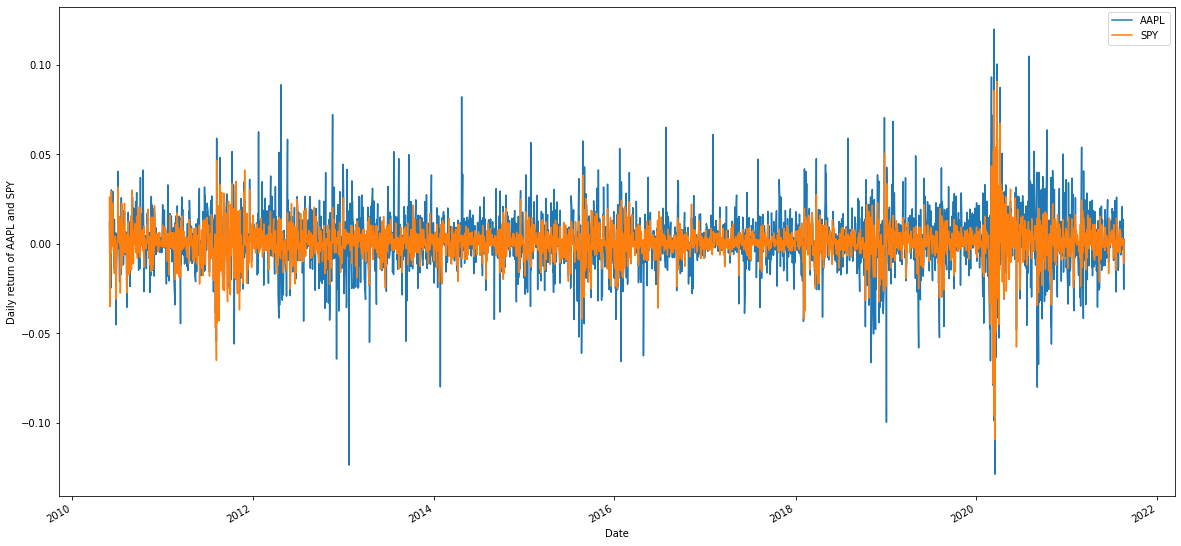

In [36]:
return1 = pd1.Close.pct_change()[1:]
return2 = pd2.Close.pct_change()[1:]

# Plot their returns against each other
plt.figure(figsize=(20,10))
return1.plot()
return2.plot()
plt.ylabel(f"Daily return of {stock1} and {stock2}")
plt.legend([stock1, stock2])
plt.show()

In [37]:
import statsmodels.api as sm
from statsmodels import regression

X = return2.values
Y = return1.values

def linreg(x,y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    
    # removing the constant
    x = x[:,1]
    return model.params[0], model.params[1]

alpha, beta = linreg(X,Y)
print('alpha: ' + str(alpha))
print('beta: ' + str(beta))

alpha: 0.0005309297921942501
beta: 1.0813553008904877


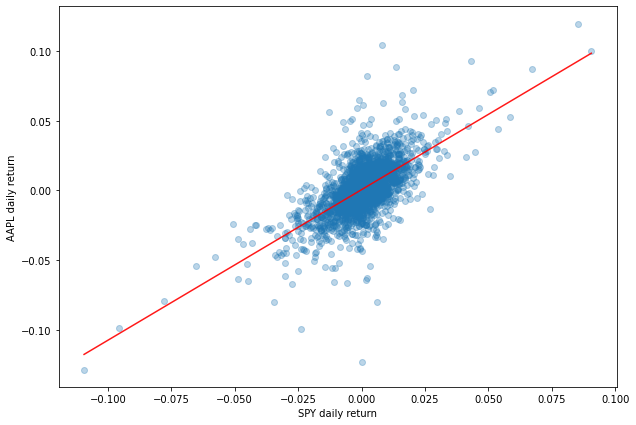

In [38]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.figure(figsize=(10,7))
plt.scatter(X, Y, alpha=0.3)
plt.xlabel(f"{stock2} daily return")
plt.ylabel(f"{stock1} daily return")
plt.plot(X2, Y_hat, 'r', alpha=0.9)
plt.show()